In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Define column names for movie.metadata.tsv
movie_metadata_columns = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie name", "Movie release date",
                          "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres"]

# Read movie.metadata.tsv into a DataFrame
movie_metadata_df = pd.read_csv("../data/movie.metadata.tsv", sep='\t', header=None, names=movie_metadata_columns)

# Define column names for name.clusters.txt
name_clusters_columns = ["Movie name", "Freebase Movie ID"]

# Read name.clusters.txt into a DataFrame
name_clusters_df = pd.read_csv("../data/name.clusters.txt", sep='\t', header=None, names=name_clusters_columns)

# Define column names for character.metadata.tsv
character_metadata_columns = ["Wikipedia Movie ID", "Freebase Movie ID", "Movie release date", "Character name",
                              "Actor DOB", "Actor gender", "Actor height", "Actor ethnicity","Actor name",
                              "Actor age at movie release", "x", "y","z",]

# Read character.metadata.tsv into a DataFrame
character_metadata_df = pd.read_csv("../data/character.metadata.tsv", sep='\t', header=None, names=character_metadata_columns)
character_metadata_df

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,x,y,z
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [2]:
movie_metadata_df

,Wikipedia Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [3]:

# Function to extract genre names without Freebase codes
def extract_genre_names(genre_dict):
    genre_names = []
    for code, name in genre_dict.items():
        genre_names.append(name)
    return ", ".join(genre_names)

# Clean the "Movie genres" column
movie_metadata_df["Movie genres"] = movie_metadata_df["Movie genres"].apply(eval)  # Convert string representation of dictionary to actual dictionary
movie_metadata_df["Movie genres"] = movie_metadata_df["Movie genres"].apply(extract_genre_names)

# Clean the "Movie languages" column (assuming similar structure to genres column)
movie_metadata_df["Movie languages"] = movie_metadata_df["Movie languages"].apply(eval)
movie_metadata_df["Movie languages"] = movie_metadata_df["Movie languages"].apply(lambda x: ", ".join(x.values()))

# Clean the "Movie countries" column (assuming similar structure to genres column)
movie_metadata_df["Movie countries"] = movie_metadata_df["Movie countries"].apply(eval)
movie_metadata_df["Movie countries"] = movie_metadata_df["Movie countries"].apply(lambda x: ", ".join(x.values()))

# Now movie_metadata_df has cleaned columns with genre names without Freebase codes


In [4]:
# Count the number of movies per genre
genre_counts = pd.DataFrame(movie_metadata_df["Movie genres"].str.split(", ").explode().value_counts())

print("Number of Movies per Genre:")
genre_counts

Number of Movies per Genre:


,count
Movie genres,
Drama,34007
Comedy,16349
Romance Film,10234
Black-and-white,9094
Action,8798
...,...
Romantic thriller,1
Comdedy,1
C-Movie,1


In [5]:
# Compute average height of male and female characters
male_avg_height = character_metadata_df[character_metadata_df["Actor gender"] == "M"]["Actor height"].mean()
female_avg_height = character_metadata_df[character_metadata_df["Actor gender"] == "F"]["Actor height"].mean()

print("Average Height of Male Characters:", male_avg_height)
print("Average Height of Female Characters:", female_avg_height)


Average Height of Male Characters: 1.8637978485552429
Average Height of Female Characters: 1.659007531451827


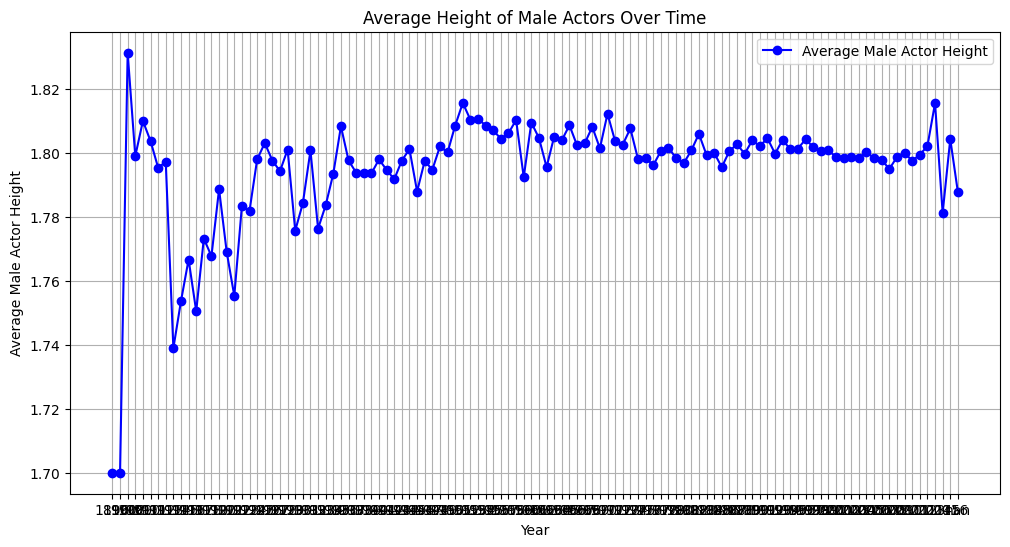

In [19]:
# Extract year from release year 
character_metadata_df["Year"] = character_metadata_df["Movie release date"].astype(str).str[:4]

# Drop rows with NaN values in the Actor height column
character_metadata_df = character_metadata_df.dropna(subset=["Actor height"])

# Filter male actors and heights less than or equal to 3, and group by year to calculate average height
male_actors_filtered = character_metadata_df[(character_metadata_df["Actor gender"] == "M") & (character_metadata_df["Actor height"] <= 3)].groupby("Year")

# Calculate average height for filtered male actors per year
average_height_per_year = male_actors_filtered["Actor height"].mean()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(average_height_per_year.index, average_height_per_year.values, label='Average Male Actor Height', marker='o', color='b')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Average Male Actor Height")
plt.title("Average Height of Male Actors Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [14]:
average_height_per_year.head()

Year
1896    1.700000
1901    1.700000
1908    1.831333
1909    1.799000
1910    1.810000
Name: Actor height, dtype: float64

In [15]:
male_actors.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,x,y,z,Year
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001
8,975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0,2001
12,975900,/m/03vyhn,2001-08-24,McSimms,1944-07-22,M,1.800,NaN,Peter Jason,57.0,/m/0bgchxd,/m/0bgchxh,/m/03d663h,2001
22,3196793,/m/08yl5d,2000-02-16,John Ramsey,1945-02-12,M,1.850,NaN,Cliff DeYoung,55.0,/m/0lr37f7,/m/0lr3z8x,/m/07jbhb,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326906,13665528,/m/03cdj1s,1909-07-01,NaN,1887-03-24,M,1.780,/m/07bch9,Roscoe Arbuckle,NaN,/m/040l6wl,NaN,/m/0k57l,1909
327215,12030404,/m/02vmh2v,1908-12-09,Ebenezer Scrooge,1853-01-15,M,1.778,NaN,Tom Ricketts,NaN,/m/059q5pf,/m/014k85,/m/0ksh0q,1908
380180,15056534,/m/03h64m2,1911-05-25,Navarre,1881-08-14,M,1.830,NaN,Francis Ford,NaN,/m/0lt43q7,/m/0ltp1y7,/m/07gpy2,1911
420251,29391146,/m/0ds7cnf,1908-07-25,NaN,1875-01-22,M,1.800,NaN,D. W. Griffith,NaN,/m/0dw5l_p,NaN,/m/026ck,1908


In [19]:
# Top 5 movies by box office revenue
top_movies_by_revenue = movie_metadata_df.sort_values(by="Movie box office revenue", ascending=False).head()

print("Top 5 Movies by Box Office Revenue:")
print(top_movies_by_revenue[["Movie name", "Movie box office revenue"]])


Top 5 Movies by Box Office Revenue:
                                          Movie name  Movie box office revenue
23702                                         Avatar              2.782275e+09
22256                                        Titanic              2.185372e+09
28192                                   The Avengers              1.511758e+09
30278  Harry Potter and the Deathly Hallows – Part 2              1.328111e+09
18645                 Transformers: Dark of the Moon              1.123747e+09


# Male vs Female characteristics 

In [83]:
# Count the number of male and female actors per year
male_actors = character_metadata_df[character_metadata_df["Actor gender"] == "M"].groupby("Year").size()
female_actors = character_metadata_df[character_metadata_df["Actor gender"] == "F"].groupby("Year").size()

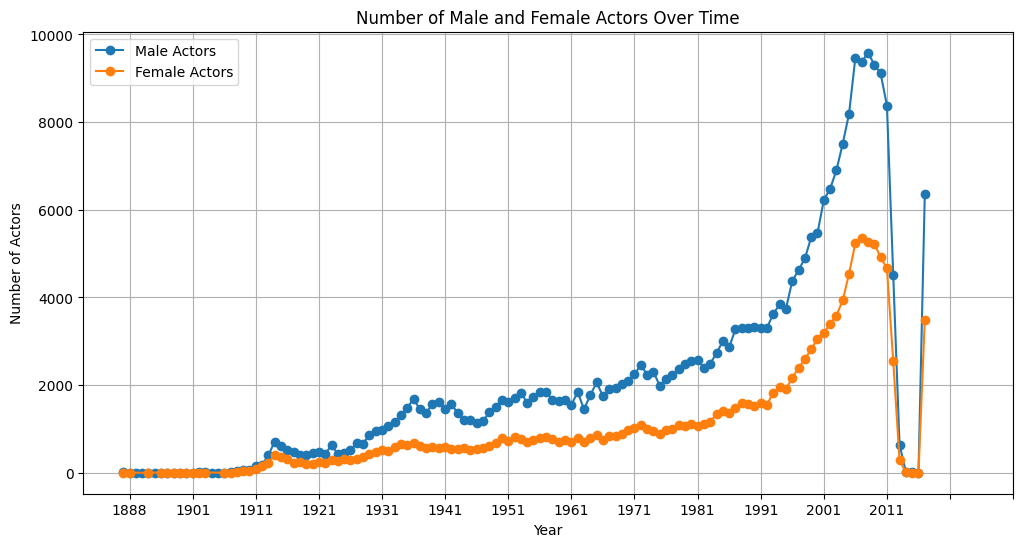

In [84]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(male_actors.index, male_actors.values, label='Male Actors', marker='o')
plt.plot(female_actors.index, female_actors.values, label='Female Actors', marker='o')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Number of Actors")
plt.title("Number of Male and Female Actors Over Time")
plt.xticks(np.arange(1,150,step=10))
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


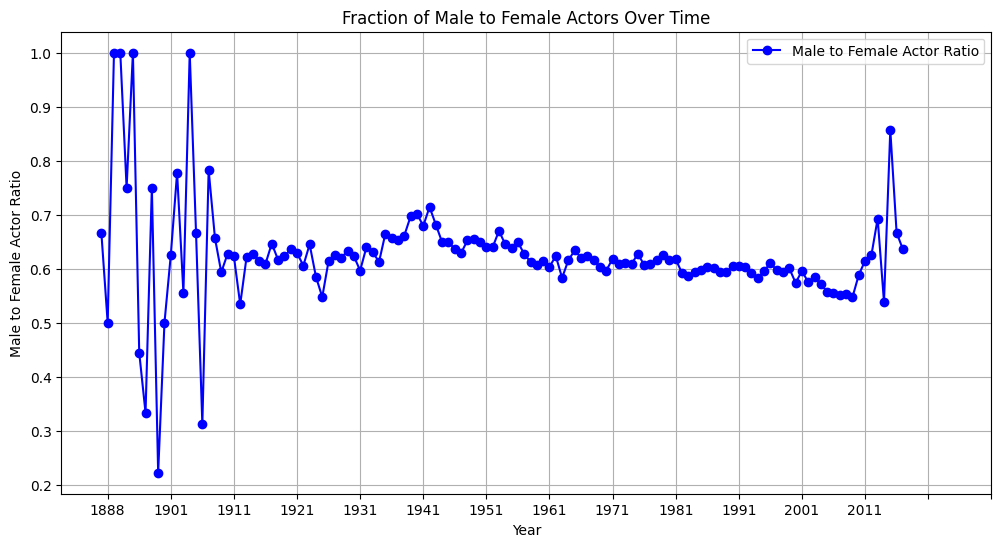

In [30]:
import matplotlib.pyplot as plt

# Calculate the total number of actors (both male and female) per year
total_actors = character_metadata_df.groupby("Year").size()

# Calculate the fraction of male to female actors per year
male_fraction = male_actors / total_actors

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(male_fraction.index, male_fraction.values, label='Male to Female Actor Ratio', marker='o', color='b')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Male to Female Actor Ratio")
plt.title("Fraction of Male to Female Actors Over Time")
plt.xticks(np.arange(1,150,step=10))
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Boxoffice per genre

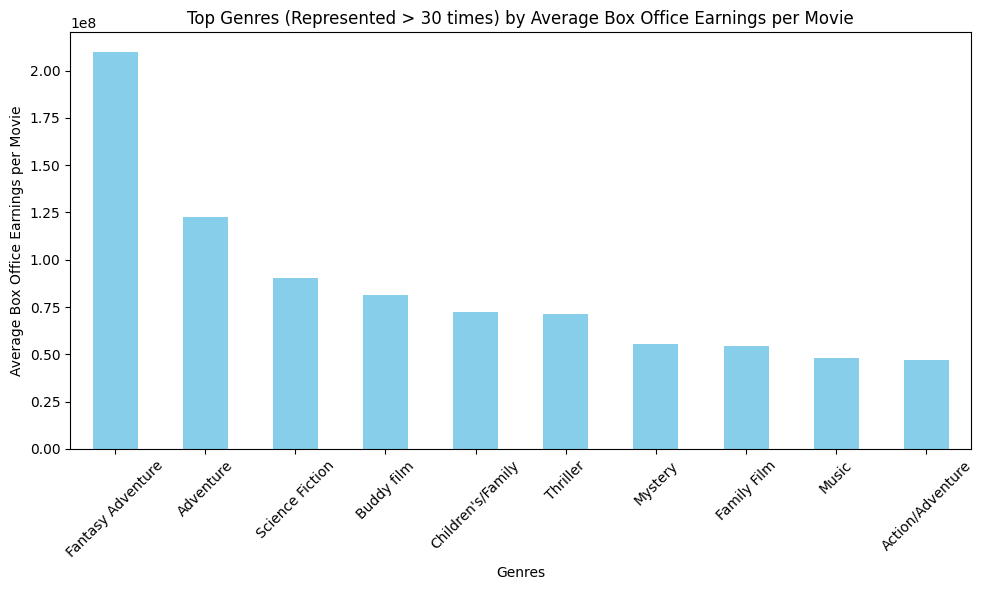

In [81]:
# Extract genres and box office columns
genres = movie_metadata_df['Movie genres'].apply(lambda x: x.split(', ')[0])
box_office = movie_metadata_df['Movie box office revenue'].astype(float)

# Create a new DataFrame to store genre-wise box office data
genre_box_office_df = pd.DataFrame({'Genres': genres, 'BoxOffice': box_office})

# Remove rows with NaN values in the BoxOffice column
genre_box_office_df = genre_box_office_df.dropna(subset=['BoxOffice'])

# Minimum represented datapoints
datapoints = 30

# Filter genres that are represented more than 10 times
genre_counts = genre_box_office_df['Genres'].value_counts()
filtered_genres = genre_counts[genre_counts > datapoints].index
filtered_genre_box_office_df = genre_box_office_df[genre_box_office_df['Genres'].isin(filtered_genres)]

# Group by genres and calculate the average box office earnings per movie for each genre
genre_average_earnings = filtered_genre_box_office_df.groupby('Genres')['BoxOffice'].mean()

# Get the top 10 genres with the highest average box office earnings per movie
top_genres = genre_average_earnings.nlargest(10)

# Create a bar plot for the top 10 genres and their average box office earnings
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title("Top Genres (Represented > " + str(datapoints) + " times) by Average Box Office Earnings per Movie")
plt.xlabel('Genres')
plt.ylabel('Average Box Office Earnings per Movie')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/hg/tvll5hmx5b580xjtn0kmrff00000gn/T/ipykernel_3863/3874745539.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept, slope = results.params[0], results.params[1]
/var/folders/hg/tvll5hmx5b580xjtn0kmrff00000gn/T/ipykernel_3863/3874745539.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1]


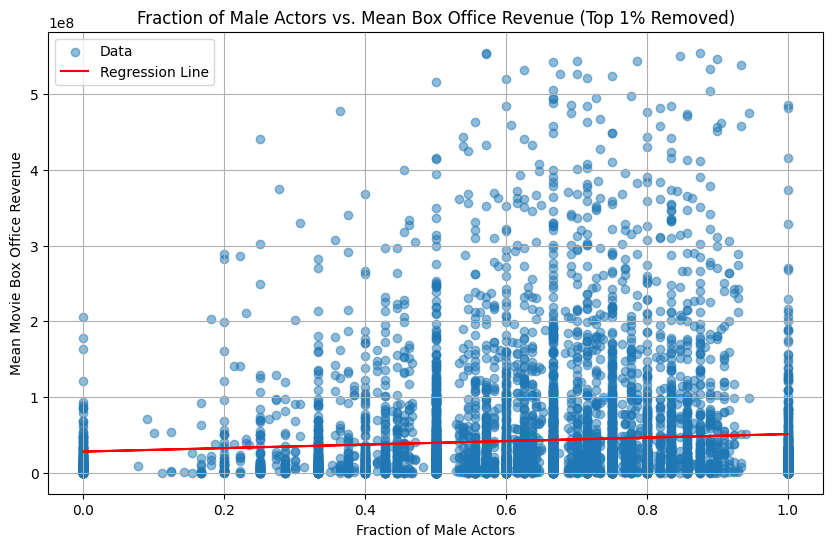

Regression Coefficients:
Intercept: 27929743.778781515
Slope (Coefficient for Fraction of Male Actors): 23108724.927542884
P-value: 3.0316994276212154e-10


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Merge character_metadata_df and movie_metadata_df on 'Wikipedia Movie ID'
merged_df = pd.merge(character_metadata_df, movie_metadata_df, on='Wikipedia Movie ID')

# Calculate fraction of male actors in each movie
merged_df['Fraction of Male Actors'] = merged_df['Actor gender'].apply(lambda x: 1 if x == 'M' else 0)
fraction_male_actors = merged_df.groupby('Wikipedia Movie ID')['Fraction of Male Actors'].mean()

# Group merged data by movie and calculate the mean box office revenue
mean_revenue = merged_df.groupby('Wikipedia Movie ID')['Movie box office revenue'].mean()

# Calculate the 99th percentile of movie revenues
revenue_threshold = mean_revenue.quantile(0.99)

# Filter out the top 1% movies with the highest gross
filtered_data = merged_df[merged_df['Movie box office revenue'] <= revenue_threshold]

# Calculate fraction of male actors and mean revenue after filtering
filtered_fraction_male_actors = filtered_data.groupby('Wikipedia Movie ID')['Fraction of Male Actors'].mean()
filtered_mean_revenue = filtered_data.groupby('Wikipedia Movie ID')['Movie box office revenue'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(filtered_fraction_male_actors, filtered_mean_revenue, alpha=0.5, label='Data')
plt.plot(filtered_fraction_male_actors, intercept + slope * filtered_fraction_male_actors, color='red', label='Regression Line')
plt.xlabel('Fraction of Male Actors')
plt.ylabel('Mean Movie Box Office Revenue')
plt.title('Fraction of Male Actors vs. Mean Box Office Revenue (Top 1% Removed)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Calculate the fraction of male actors in each movie
male_actors_fraction = character_metadata_df.groupby(["Wikipedia Movie ID", "Freebase Movie ID"])["Actor gender"].apply(lambda x: (x == 'M').mean()).reset_index(name='Male Actors Fraction')

# Merge DataFrames on 'Wikipedia Movie ID' and 'Freebase Movie ID'
merged_df = pd.merge(movie_metadata_df, male_actors_fraction, on=["Wikipedia Movie ID", "Freebase Movie ID"], how="inner")

# Calculate the 99th percentile of box office revenue
revenue_threshold = merged_df["Movie box office revenue"].quantile(0.99)

# Remove the top 1% movies with highest box office revenue
merged_df = merged_df[merged_df["Movie box office revenue"] <= revenue_threshold]

# Remove movies where only one gender is represented
merged_df = merged_df[(merged_df["Male Actors Fraction"] > 0) & (merged_df["Male Actors Fraction"] < 1)]

# OLS regression
X = sm.add_constant(merged_df["Male Actors Fraction"])  # Add a constant for the intercept
y = merged_df["Movie box office revenue"]

model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Movie box office revenue   R-squared:                       0.015
Model:                                  OLS   Adj. R-squared:                  0.015
Method:                       Least Squares   F-statistic:                     121.3
Date:                      Wed, 01 Nov 2023   Prob (F-statistic):           5.35e-28
Time:                              17:24:18   Log-Likelihood:            -1.5207e+05
No. Observations:                      7770   AIC:                         3.041e+05
Df Residuals:                          7768   BIC:                         3.042e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

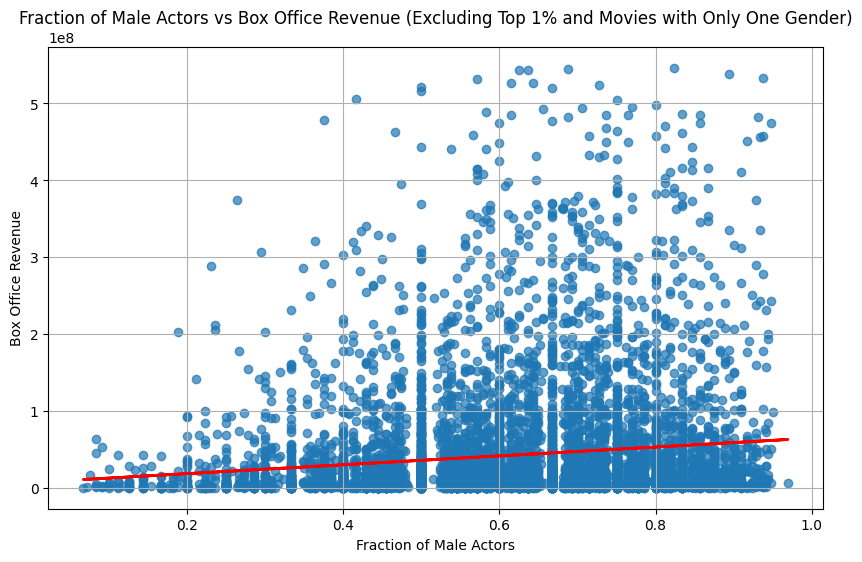

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["Male Actors Fraction"], merged_df["Movie box office revenue"], alpha=0.7)
plt.xlabel("Fraction of Male Actors")
plt.ylabel("Box Office Revenue")
plt.title("Fraction of Male Actors vs Box Office Revenue (Excluding Top 1% and Movies with Only One Gender)")
plt.grid(True)

# Plot regression line
plt.plot(merged_df["Male Actors Fraction"], model.predict(X), color='red', linewidth=2)

plt.show()